# Finding regions of high density with **DBSCAN**
Density-based Spatial Clustering of Applications with Noise.

DBSCAN does not make assumptions about spherical clusters like k-means, nor does it partition the dataset into hierarchies that require a manual cut-off point.

For DBSCAN, a cluster is a dense area surrounded by less dense areas 

### Notion of density:

In DBSCAN is defined as the number of points within a specified radius $\varepsilon$

### How does DBSCAN labels the data?

+ A point is considered a **core point** if at least a specified number ($MinSamples$) of neighboring points fall within the specified radius $\varepsilon$.

+ A **border point** is a point that has fewer neighbors than $MinSamples$ within, but lies within the radius $\varepsilon$ of a core point.

+ All other points that are neither core nor border points are considered **noise points**.

After labeling the points as core, border, or noise, the DBSCAN algorithm can be summarized in two steps:

1. Form a separate cluster for each core point or connected group of core points (core points are connected if they lay inside $\varepsilon$ of another core point).

2. Assign each border point to the cluster of its corresponding core point.

### How to use DBSCAN with sklearn

In [1]:
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/home/biel/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/biel/miniconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


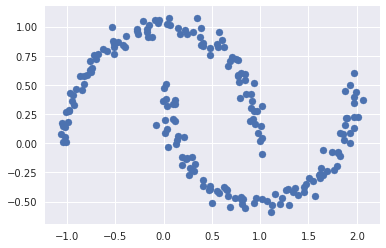

In [3]:
X, y = make_moons(200, noise=0.05)
plt.scatter(X[:,0], X[:,1])

In [14]:
db = DBSCAN(eps=0.2, min_samples=5)

In [15]:
y_db = db.fit_predict(X)

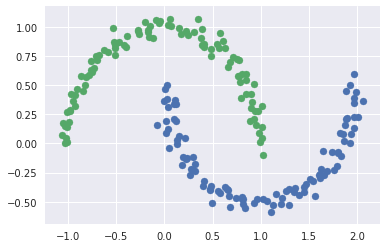

In [16]:
for l in np.unique(y_db):
    plt.scatter(X[y_db==l, 0], X[y_db==l, 1])

### Pros and cons of DBSCAN


Pros:
+ We don't have to choose a number of clusters $k$
+ Does not assume that the clusters have spherical shape
+ Does not necessarily assign each point to a cluster 

Cons:

+ We now have two hyperparameters to optimize: $\varepsilon$ and $MinSamples$
+ Finding a good combinations of hyperparameters can be problematic if the density differences in the dataset are relatively large

+ like all the clusterers that use euclidean distance, the curse of dimensionality increases as we increase the number of dimensions.


##  HDBSCAN

[docs](http://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html)

HDBSCAN is a clustering algorithm developed by Campello, Moulavi, and Sander. It extends DBSCAN by converting it into a hierarchical clustering algorithm, and then using a technique to extract a flat clustering based in the stability of clusters.

In [17]:
import hdbscan

In [23]:
hdb = hdbscan.HDBSCAN(gen_min_span_tree=True)

In [24]:
y_hdb = hdb.fit_predict(X)

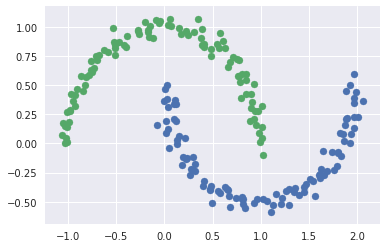

In [25]:
for l in np.unique(y_hdb):
    plt.scatter(X[y_db==l, 0], X[y_db==l, 1])

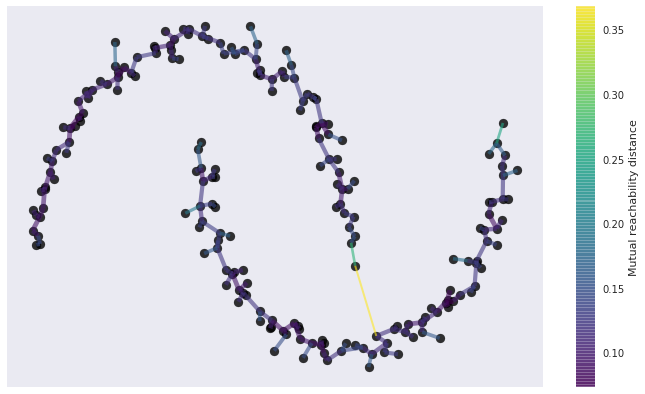

In [38]:
plt.figure(figsize=(12,7))
hdb.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)